<h1>  Regression </h1>

### 2. Importing the packages and dataset  <a id='packages'>

In [0]:

from google.colab import files
uploaded= files.upload()

Saving Loan payments data.csv to Loan payments data.csv


In [0]:
# Importing the libraries

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#Load  File

cred_df = pd.read_csv("Loan payments data.csv")

### 3. Exploratory Data Analysis  <a id='eda'>

In [0]:
cred_df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [0]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [0]:
cred_df['past_due_days'] = pd.to_numeric(cred_df['past_due_days'], errors='coerce')
cred_df["past_due_days"].fillna("0", inplace = True)
cred_df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1,38,college,female


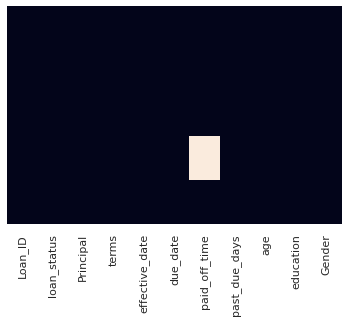

In [0]:
sns.heatmap(data=cred_df.isnull(),yticklabels=False,cbar=False)

In [0]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Loan_ID         500 non-null    object
 1   loan_status     500 non-null    object
 2   Principal       500 non-null    int64 
 3   terms           500 non-null    int64 
 4   effective_date  500 non-null    object
 5   due_date        500 non-null    object
 6   paid_off_time   400 non-null    object
 7   past_due_days   500 non-null    object
 8   age             500 non-null    int64 
 9   education       500 non-null    object
 10  Gender          500 non-null    object
dtypes: int64(3), object(8)
memory usage: 43.1+ KB


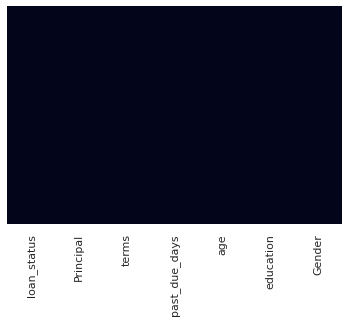

In [0]:
#checking for missing values 
sns.heatmap(data=cred_df.isnull(),yticklabels=False,cbar=False)

In [0]:
cred_df.drop('Loan_ID', axis=1, inplace=True)
cred_df.drop('effective_date', axis=1, inplace=True)
cred_df.drop('due_date', axis=1, inplace=True)
cred_df.drop('paid_off_time', axis=1, inplace=True)

cred_df

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,0.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bechalor,female
2,PAIDOFF,1000,30,0.0,33,Bechalor,female
3,PAIDOFF,1000,15,0.0,27,college,male
4,PAIDOFF,1000,30,0.0,28,college,female
...,...,...,...,...,...,...,...
495,COLLECTION_PAIDOFF,1000,30,3.0,28,High School or Below,male
496,COLLECTION_PAIDOFF,1000,15,14.0,26,High School or Below,male
497,COLLECTION_PAIDOFF,800,15,3.0,30,college,male
498,COLLECTION_PAIDOFF,1000,30,1.0,38,college,female


# **Loan Status identified as the 'KEY VARIABLE'.**


# **# Reference notes **

The data set has been devided into 3 parts basis the key variable  "Loan_ sattus and named as follows
cred_df : the entire data set

1.  cred_df : the entire data set

2.  cred_df1 :subset of cred_df ( rowwise for key  variable Loan_status ) data for customers  who paid after due date. Include the rows collection and collection paidoff; where 0= collection & 1= collection paid off

3.   cred_df2: subset if cred_df for customers who PAIDOFF on time




In [0]:

# subsetting the dataframe to remove rowwise data for customers who PAID after due date and collection calls where 0= collection & 1= collection paid off

lpd1 = ['COLLECTION_PAIDOFF', 'COLLECTION']
cred_df1 =cred_df.loc[cred_df['loan_status'].isin(lpd1)]

cred_df1

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
300,xqd20160301,COLLECTION,1000,15,9/9/2016,9/23/2016,NaN,76,29,college,male
301,xqd20160302,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61,37,High School or Below,male
302,xqd20160303,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61,33,High School or Below,male
303,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76,27,college,male
304,xqd20160305,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76,24,Bechalor,male
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1,38,college,female


In [0]:
cred_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Principal,200.0,955.500,87.796876,500.0,1000.0,1000.0,1000.0,1000.0
terms,200.0,23.885,7.451807,7.0,15.0,30.0,30.0,30.0
age,200.0,30.975,6.164771,18.0,26.0,30.0,35.0,50.0


In [0]:
# subsetting the dataframe to remove data for customers who PAID 
lpd2 = ['PAIDOFF']
cred_df2 =cred_df.loc[cred_df['loan_status'].isin(lpd2)]

cred_df2

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
295,xqd20160296,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 13:00,NaN,30,college,female
296,xqd20160297,PAIDOFF,800,15,9/14/2016,9/28/2016,9/21/2016 4:42,NaN,27,college,male
297,xqd20160298,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 9:00,NaN,29,High School or Below,male
298,xqd20160299,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 9:00,NaN,40,High School or Below,male


In [0]:
cred_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Principal,300.0,935.000000,129.863576,300.0,800.0,1000.0,1000.0,1000.0
terms,300.0,22.116667,8.282414,7.0,15.0,30.0,30.0,30.0
age,300.0,31.210000,6.039383,19.0,27.0,30.0,35.0,51.0


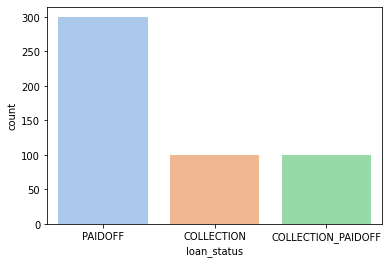

In [0]:
sns.countplot (x='loan_status', data= cred_df, palette='pastel') 

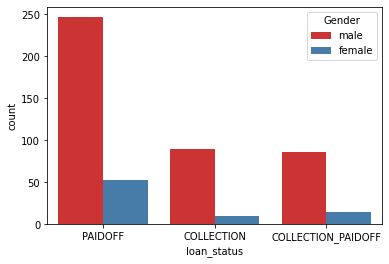

In [0]:
count_gender = sns.countplot(x="loan_status", data=cred_df , hue='Gender', palette="Set1")

count_gender

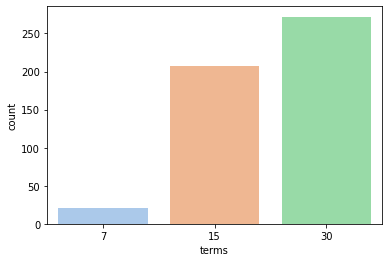

In [0]:
count_terms = sns.countplot(x="terms", data=cred_df , palette='pastel', linewidth=2, )
count_terms

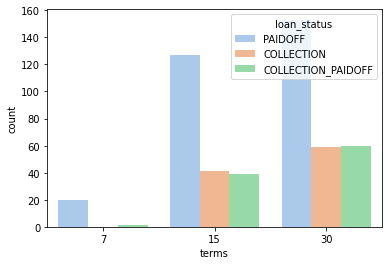

In [0]:
x = sns.countplot(x="terms", data=cred_df , hue='loan_status', palette='pastel', linewidth=5)

<Figure size 3600x3960 with 0 Axes>

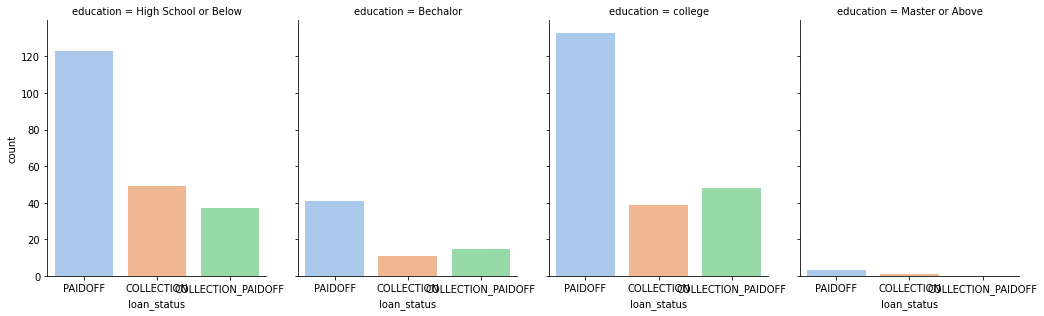

In [0]:

fig1 = plt.figure(figsize=(50,55))
g = sns.catplot("loan_status", col="education", col_wrap=4, palette='pastel',
                 data=cred_df[cred_df.loan_status.notnull()],
                 kind="count", height=4.5, aspect=.8)

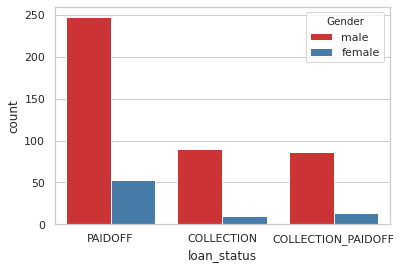

In [0]:
sns.set(style="whitegrid")
ax = sns.countplot(x="loan_status", hue="Gender", data=cred_df , palette="Set1" )

<Figure size 1800x1800 with 0 Axes>

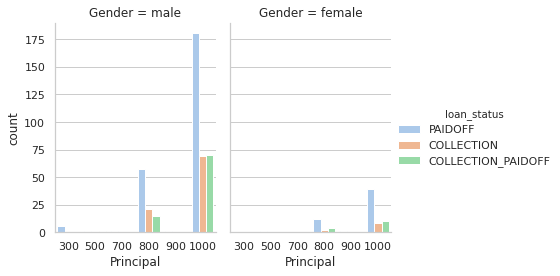

In [0]:
fig = plt.figure(figsize=(25,25))
g = sns.catplot(x="Principal", hue="loan_status", col="Gender",palette='pastel',
                data=cred_df, kind="count",
                 height=4, aspect=.7);

# `Notes: Pair plots with Gender and education as color `


The plots are an attempt to understand relation between subsets of people who paid on time versues those who paid after due date.

Consolidation submitted on the PPt slides submitted.

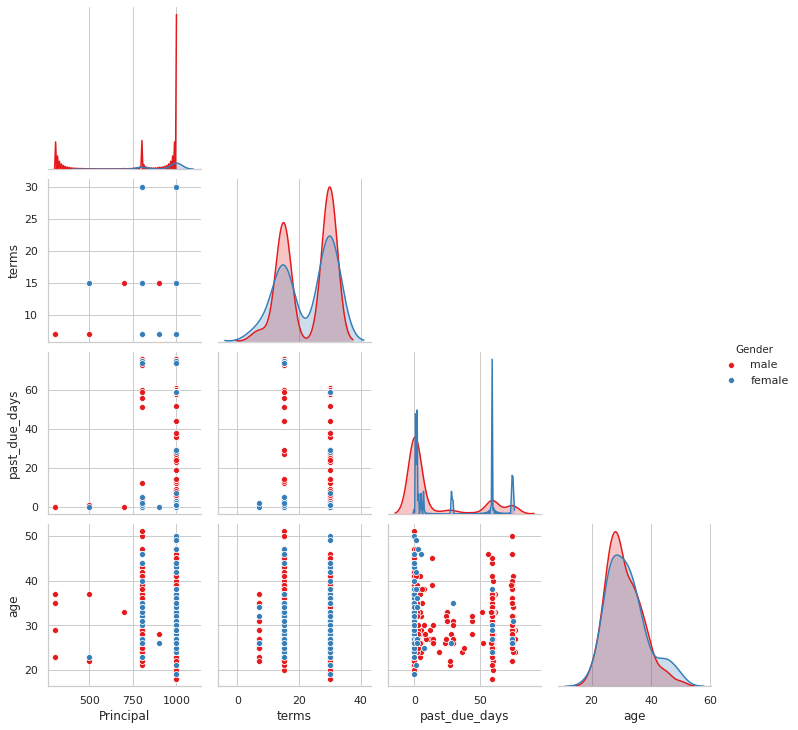

In [0]:
# Lets draw a pairplot to see data visualisation from different variables impact factor 
sns.pairplot(cred_df, hue='Gender', palette="Set1", corner=True)

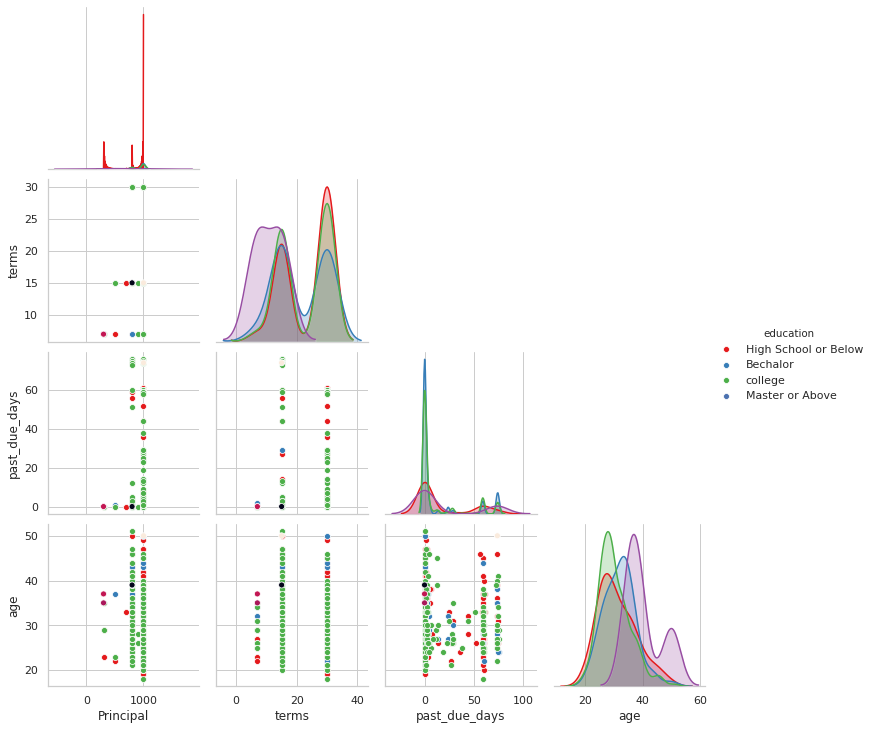

In [0]:
# Lets draw a pairplot to see data visualisation from different variables impact factor 
sns.pairplot(cred_df, hue='education', palette="Set1", corner=True)

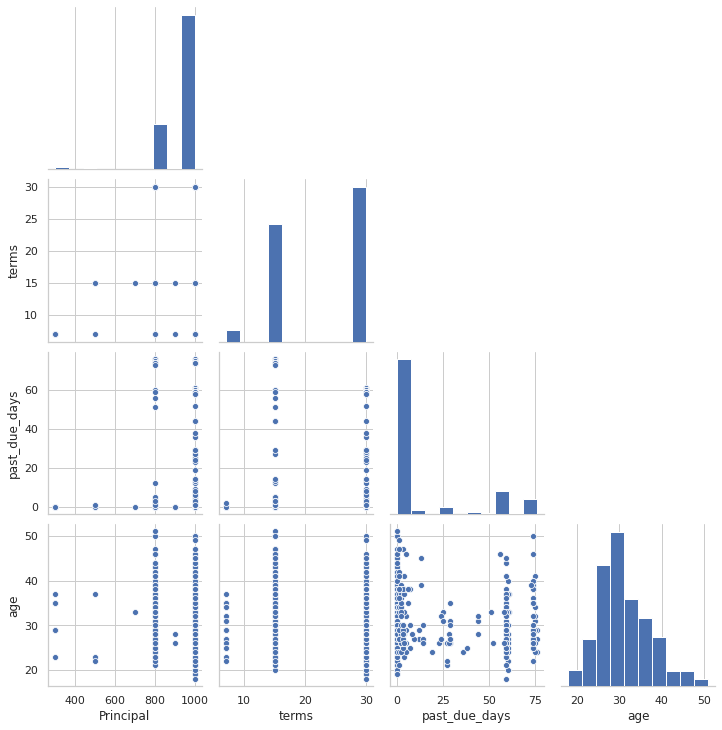

In [0]:
# Lets draw a pairplot to see data visualisation from different variables impact factor 
sns.pairplot(cred_df,   corner=True)

Observation: No obvious pattern



Notes: lm plots with age and principal basis subsets of the data set

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


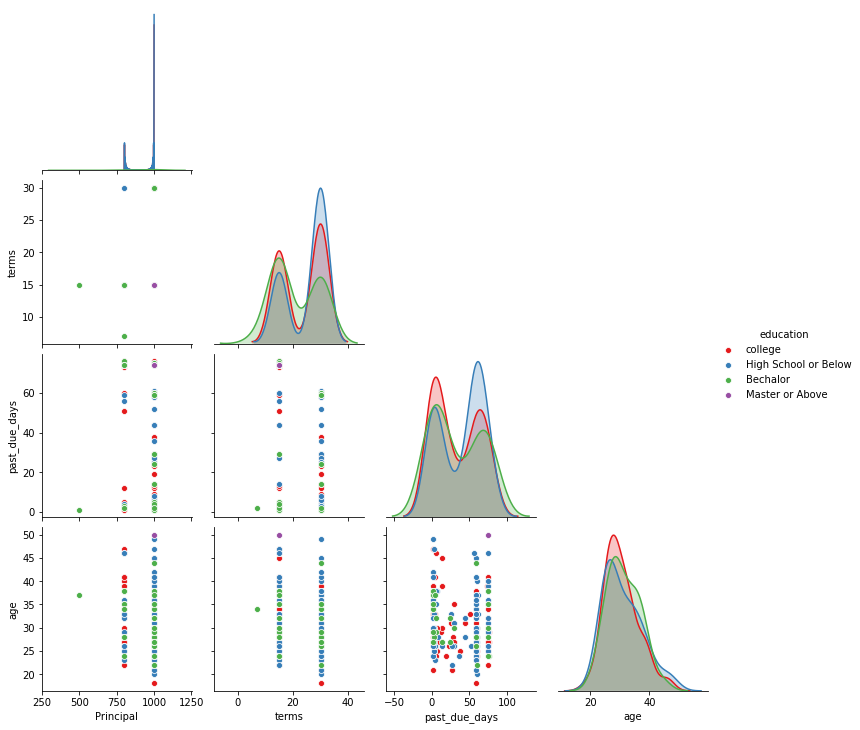

In [0]:
# Lets draw a pairplot to see data visualisation from different variables impact factor 
sns.pairplot(cred_df1, hue='education', palette="Set1", corner=True)

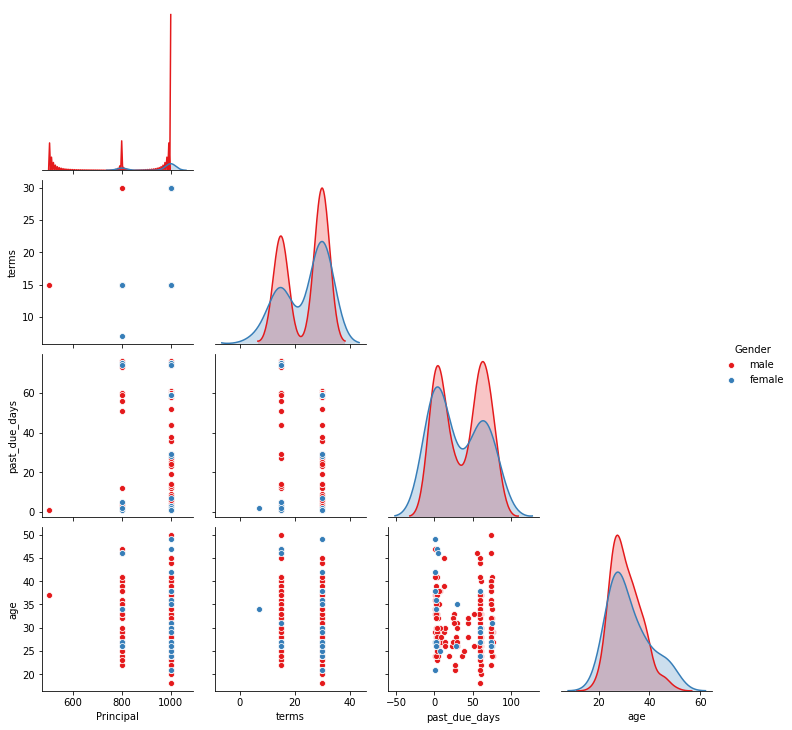

In [0]:
sns.pairplot(cred_df1, hue='Gender', palette="Set1", corner=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


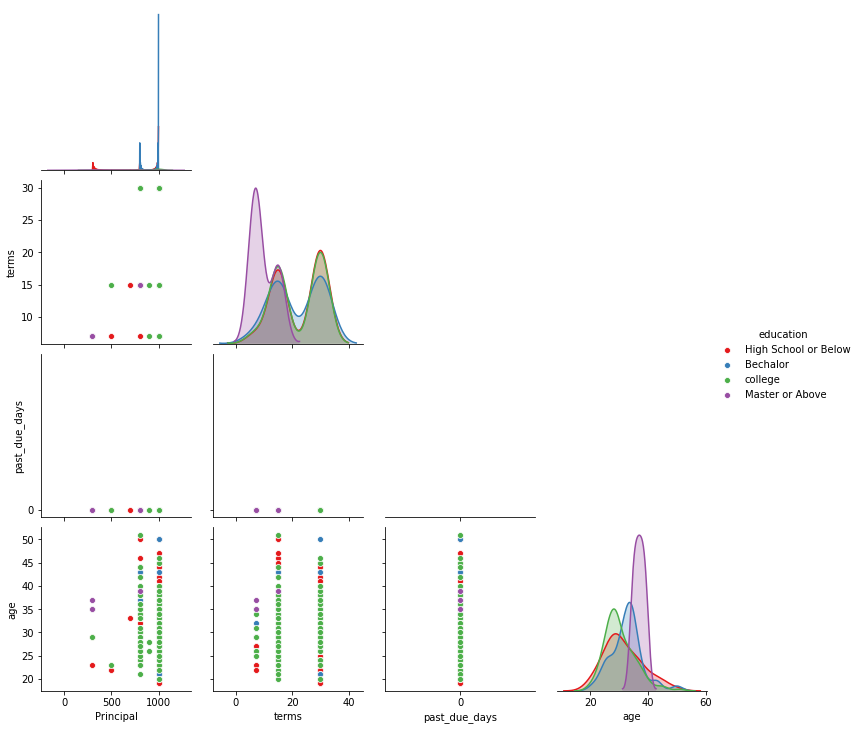

In [0]:
# Lets draw a pairplot to see data visualisation from different variables impact factor 
sns.pairplot(cred_df2, hue='education', palette="Set1", corner=True)

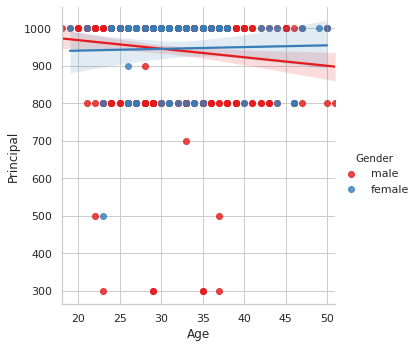

In [0]:
lmplot = sns.lmplot(x="age", y="Principal", hue="Gender",
               truncate=True, height=5, data=cred_df, palette="Set1")

# Use more informative axis labels than are provided by default
lmplot.set_axis_labels("Age", "Principal")

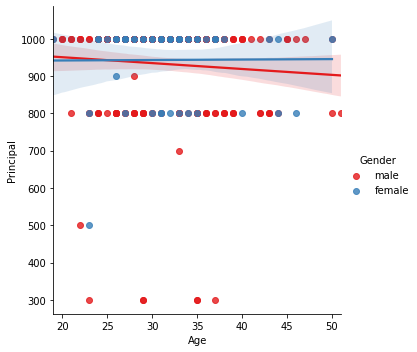

In [0]:
lmplot2 = sns.lmplot(x="age", y="Principal", hue="Gender",
               truncate=True, height=5, data=cred_df2, palette="Set1")

# Use more informative axis labels than are provided by default
lmplot2.set_axis_labels("Age", "Principal")

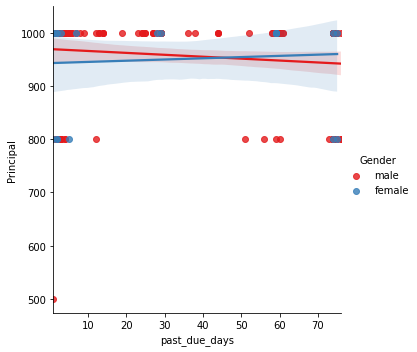

In [0]:
lmplot1 = sns.lmplot(x="past_due_days", y="Principal", hue="Gender",
                height=5, data=cred_df, palette="Set1" )

# Use more informative axis labels than are provided by default
lmplot.set_axis_labels("past_due_days", "Principal")

Observation: Increase in age females take higher loan amounts and are more likely to delay compared to men. 



Ref Note: Distribution of how many people have not paid on time.

this cann be a relevant input for tyhe risk carried by the loan provider.

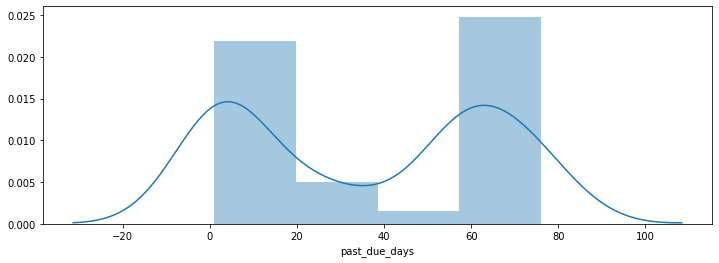

In [0]:

plt.figure(figsize=(12,4))
sns.distplot(cred_df['past_due_days'])

In [0]:
cred_df.groupby('loan_status').agg(['count'])

,Principal,terms,past_due_days,age,education,Gender
,count,count,count,count,count,count
loan_status,,,,,,
COLLECTION,100,100,100,100,100,100
COLLECTION_PAIDOFF,100,100,100,100,100,100
PAIDOFF,300,300,300,300,300,300


In [0]:
cred_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Principal,500.0,943.200,115.240274,300.0,1000.0,1000.0,1000.0,1000.0
terms,500.0,22.824,8.000064,7.0,15.0,30.0,30.0,30.0
past_due_days,200.0,36.010,29.380880,1.0,3.0,37.0,60.0,76.0
age,500.0,31.116,6.084784,18.0,27.0,30.0,35.0,51.0


In [0]:
cred_df.groupby('loan_status').agg(['mean'])

,Principal,terms,past_due_days,age
,mean,mean,mean,mean
loan_status,,,,
COLLECTION,954,23.850000,62.86,30.61
COLLECTION_PAIDOFF,957,23.920000,9.16,31.34
PAIDOFF,935,22.116667,NaN,31.21


**Observation:** People who have more balance have defaulted more in their credit card payments.

**Observation:** 

In [0]:
from matplotlib import style

Ref Notes: Understanding age profiles of entire data set. Comparing age profile of people who paid on time vs those who paid after due date .

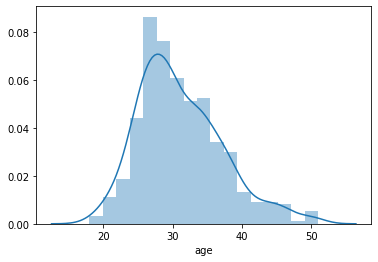

In [0]:
sns.distplot(cred_df['age'])

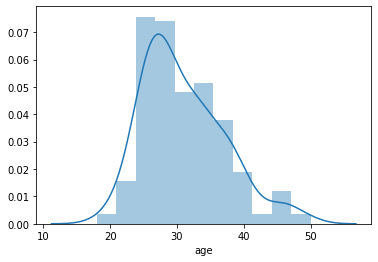

In [0]:

sns.distplot(cred_df1['age'])

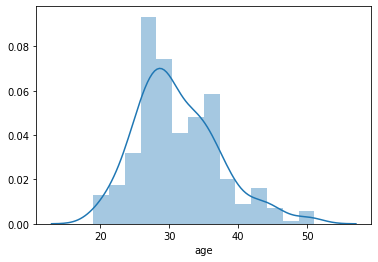

In [0]:
sns.distplot(cred_df2['age'])

Observation: The age profile of subsets and the entire population shows a normal distribution. 
Attemping x as the independent variable and Y as dependent variable.

attempting to discover relation if principal is dependent on age 


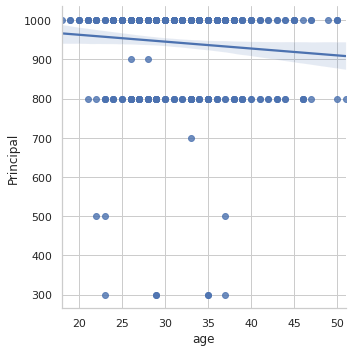

In [0]:
lmplot_display = sns.lmplot(x="age", y="Principal",
               truncate=True, height=5, data=cred_df, palette="Set1")

# Use more informative axis labels than are provided by default
lmplot2.set_axis_labels("Age", "Principal")


Observation : Loan taken amount decreases with increases in age. ( negative correlation confirmed by calculation of intercept and a negative coefficient value. 

cred_df1= Paid after due date and collection calls where 0= collection & 1= collection paid **off**

cred_df2= Paid by due date. 

# Vizualising a Regression plots
Choosing the loan statu as key variable

Reffering to the dataset cred_df1, where Loan Status has a binomila classification  0= collection & 1= collection paid off


Using age as the independent variable. Using age also because the variable has a fair spread of values for appropriate visualisation on the graph

In [0]:
cred_df1

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
300,xqd20160301,COLLECTION,1000,15,9/9/2016,9/23/2016,NaN,76.0,29,college,male
301,xqd20160302,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,37,High School or Below,male
302,xqd20160303,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,33,High School or Below,male
303,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,27,college,male
304,xqd20160305,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,24,Bechalor,male
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


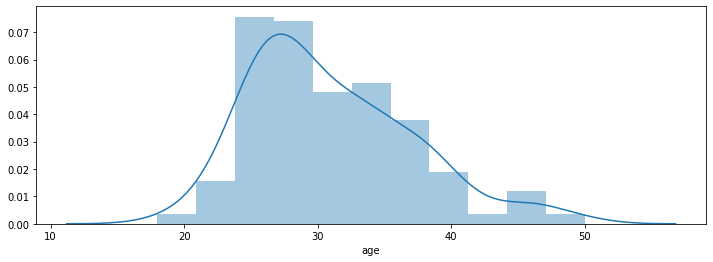

In [0]:

plt.figure(figsize=(12,4))
sns.distplot(cred_df1['age'])

In [0]:
lpd1 = ['COLLECTION_PAIDOFF', 'COLLECTION']
cred_df1 =cred_df.loc[cred_df['loan_status'].isin(lpd1)]

cred_df1

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
300,xqd20160301,COLLECTION,1000,15,9/9/2016,9/23/2016,NaN,76.0,29,college,male
301,xqd20160302,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,37,High School or Below,male
302,xqd20160303,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,33,High School or Below,male
303,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,27,college,male
304,xqd20160305,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,24,Bechalor,male
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [0]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [0]:
cred_df1['loan_status']=le.fit_transform(cred_df1['loan_status'])

cred_df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
300,xqd20160301,0,1000,15,9/9/2016,9/23/2016,NaN,76,29,college,male
301,xqd20160302,0,1000,30,9/9/2016,10/8/2016,NaN,61,37,High School or Below,male
302,xqd20160303,0,1000,30,9/9/2016,10/8/2016,NaN,61,33,High School or Below,male
303,xqd20160304,0,800,15,9/9/2016,9/23/2016,NaN,76,27,college,male
304,xqd20160305,0,800,15,9/9/2016,9/23/2016,NaN,76,24,Bechalor,male


In [0]:
# Building Linear Regression Model and determining the coefficients

# Building Linear Regression Model and determining the coefficients 

from sklearn.linear_model import LinearRegression

x1 = cred_df1[['age']]
y1 = cred_df1['loan_status']

linreg = LinearRegression()
linreg.fit(x1, y1)

print(linreg.coef_)                                         # Coefficients for Linear Regression
print(linreg.intercept_)

[0.00482621]
0.35050823926086283


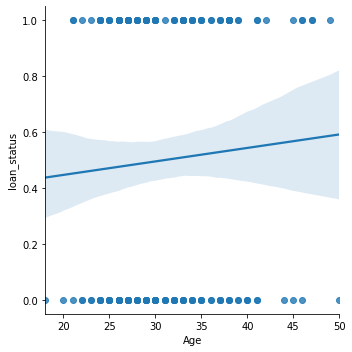

In [0]:
lmplot_display = sns.lmplot(x="age", y="loan_status",
               truncate=True, height=5, data=cred_df1, palette="Set1")

# Use more informative axis labels than are provided by default
lmplot_display.set_axis_labels("Age", "loan_status")

Observaation :
Positive  relation berween loan statis of people who paid aftedue date.

 Logistic Regression  <a id='logistic'>

In [0]:
# Building the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e42)                            # Set Large C value for low regularization to prevent overfitting
logreg.fit(x1, y1)

print(logreg.coef_)                                            # Coefficients for Logistic Regression
print(logreg.intercept_)

[[0.01937833]]
[-0.60013891]


 Visualizing Simple Linear Regression Model  <a id='lineareval'>

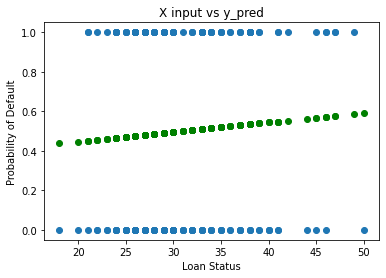

In [0]:
y_pred1 = logreg.predict_proba(x1)                               
plt.scatter(x1.values, y_pred1[:,1], color='green')              # Output of logistic Regression                     
plt.scatter(x1.values, y1)                                       # Actual data
plt.xlabel('Loan Status')
plt.ylabel('Probability of Default')
plt.title('X input vs y_pred')
plt.show()

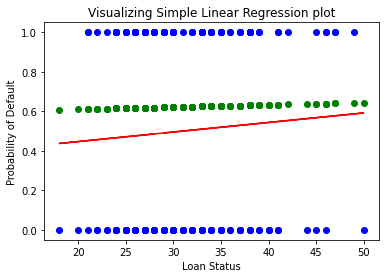

In [0]:
x_lenreg = x1.values
y_hat = linreg.intercept_ + linreg.coef_ * x_lenreg                 # Predicting y using linear regression coefficients
sig_y_hat = np.exp(y_hat)/(1+np.exp(y_hat))                         # Equation for Sigmoid function

plt.plot(x_lenreg, y_hat, color='red')                               # Visualizing Linear Regression x, y_hat
plt.scatter(x_lenreg, y1, color = 'blue')                             # Actual data
plt.scatter(x_lenreg, sig_y_hat, color = 'green')                    # Visualizing Sigmoid of linear regression output
plt.xlabel('Loan Status')
plt.ylabel('Probability of Default')
plt.title('Visualizing Simple Linear Regression plot')
plt.show()

 Visualizing Logistic Regression Model   <a id='logisticeval'>

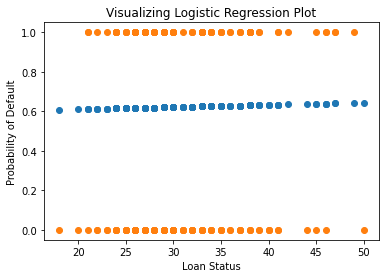

In [0]:
x_log = x1
y_hat_log = logreg.intercept_ + logreg.coef_ * x_log                     # Predicting y using logistic regression coefficients
sig_y_hat = np.exp(y_hat)/(1+np.exp(y_hat))                             # Equation for Sigmoid

plt.scatter(x=x_log, y=sig_y_hat)                                    # Visualizing Sigmoid of logistic regression predictions
plt.scatter(x=x_log, y=y1)                                            # Actual data
plt.xlabel('Loan Status')
plt.ylabel('Probability of Default')
plt.title('Visualizing Logistic Regression Plot')
plt.show()

**Observation:**
Here you can observe that the output of the logistic regression can differentiate between two labels. Hence Logistic Regression is better than Linear Regression for classification problem.

Concluding Notes: This file conains EDA.

Different file submitted for building and evaluating the model.

### The End